# Observed patterns in atmospheric CO2 over the Southern Ocean

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import cartopy.crs as ccrs

import util


#import models
#from models import detrend
import figure_panels
import obs_surface
import obs_aircraft

import datasets

In [6]:
%%time
dsets = dict(
    ds_obs_aircraft=datasets.aircraft_sections(),
    ds_obs_srf_djf=xr.open_zarr('/glade/u/home/mclong/p/sh-co2-hole/data/plots/obs-surface-stn-v-lat-djf.zarr').compute(),
    ds_obs_srf_jja=xr.open_zarr('/glade/u/home/mclong/p/sh-co2-hole/data/plots/obs-surface-stn-v-lat-jja.zarr').compute(),
)
dsets

CPU times: user 33.2 ms, sys: 6.88 ms, total: 40.1 ms
Wall time: 80.4 ms


/glade/work/mclong/miniconda3/envs/so-co2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  This is separate from the ipykernel package so we can avoid doing imports until
/glade/work/mclong/miniconda3/envs/so-co2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, 

{'ds_obs_aircraft': <xarray.Dataset>
 Dimensions:       (z: 22, y: 20, time: 9, ye: 20, ze: 23)
 Coordinates:
     ALT           (z, y) float64 0.25 0.25 0.25 0.25 ... 10.75 10.75 10.75 10.75
     LAT           (z, y) float64 -78.75 -76.25 -73.75 ... -36.25 -33.75 -31.25
     campaigns     (time) <U7 'HIPPO-1' 'HIPPO-2' 'HIPPO-3' ... 'ATOM-3' 'ATOM-4'
     month         (time) int64 1 11 4 8 2 8 2 10 5
   * time          (time) datetime64[ns] 2009-01-20 2009-11-11 ... 2018-05-07
   * y             (y) float64 -78.75 -76.25 -73.75 ... -36.25 -33.75 -31.25
   * ye            (ye) float64 -80.0 -77.5 -75.0 -72.5 ... -37.5 -35.0 -32.5
     year          (time) int64 2009 2009 2010 2011 2016 2016 2017 2017 2018
   * z             (z) float64 0.25 0.75 1.25 1.75 2.25 ... 9.25 9.75 10.25 10.75
   * ze            (ze) float64 0.0 0.5 1.0 1.5 2.0 ... 9.0 9.5 10.0 10.5 11.0
 Data variables:
     CO2_binned    (time, z, y) float64 nan nan nan nan ... 405.9 405.8 405.5
     DCO2_binned   (time, z,

CPU times: user 2.11 s, sys: 28.5 ms, total: 2.14 s
Wall time: 2.39 s


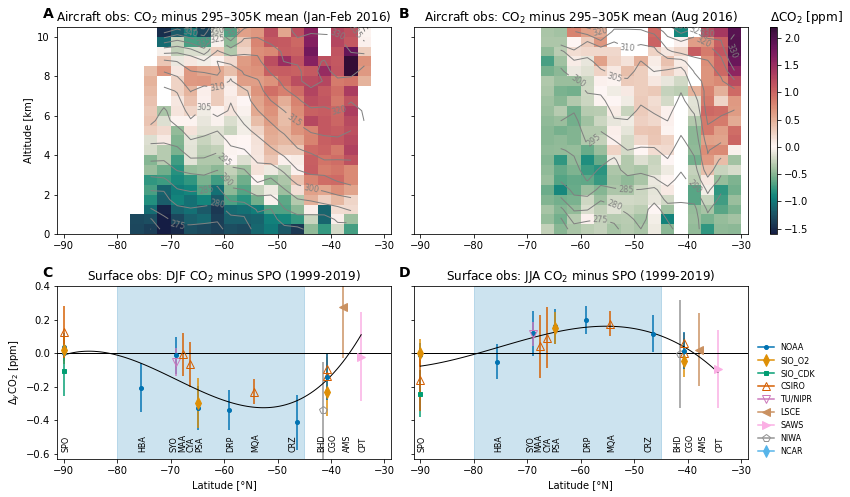

In [8]:
%%time
# set up canvas
fig = plt.figure(figsize=(10, 6)) #dpi=300)

# set up plot grid
gs_top = gridspec.GridSpec(nrows=1, ncols=3, 
                        width_ratios=(1, 1, 0.02), 
                        left=0, right=1, bottom=0.52, top=1.,
                        hspace=0.2, wspace=0.1,
                       )

gs_bot = gridspec.GridSpec(nrows=1, ncols=3, 
                        width_ratios=(1, 1, 0.02), 
                        left=0, right=1, bottom=0, top=0.4,
                        hspace=0.2, wspace=0.1,
                       )

axs = dict(
    section_DJF=plt.subplot(gs_top[0, 0]),
    section_JJA=plt.subplot(gs_top[0, 1]),
    surface_DJF=plt.subplot(gs_bot[0, 0]),
    surface_JJA=plt.subplot(gs_bot[0, 1]),        
)
caxs = dict(
    section=plt.subplot(gs_top[:, -1]),
)

#------------------------------------
#--- ORCAS Section
#------------------------------------

ds = dsets['ds_obs_aircraft']
ax = axs['section_DJF']

ndx = np.where(ds.campaigns == 'ORCAS')[0][0]
cf = ax.pcolormesh(
        ds.y, ds.z, ds.DCO2_binned.isel(time=ndx).squeeze(),
        norm=figure_panels.divnorm,
        cmap=figure_panels.cmap,
        shading='nearest',    
    )
cs = ax.contour(
    ds.LAT, ds.ALT, ds.THETA.isel(time=ndx).squeeze(),
    levels=np.arange(255., 350., 5.),
    linewidths=1,
    colors='gray')    
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%d')  

ax.set_title('Aircraft obs: CO$_2$ minus 295–305K mean (Jan-Feb 2016)')
ax.set_ylim((0, 10.5))
ax.set_xlim(-91.25, -28.75)
ax.set_ylabel('Altitude [km]')        


#------------------------------------
#--- ATom Section
#------------------------------------

ds = dsets['ds_obs_aircraft']
ax = axs['section_JJA']

ndx = np.where(ds.campaigns == 'ATOM-1')[0][0]
cf = ax.pcolormesh(
        ds.y, ds.z, ds.DCO2_binned.isel(time=ndx).squeeze(),
        norm=figure_panels.divnorm,
        cmap=figure_panels.cmap,
        shading='nearest',
    )
cs = ax.contour(
    ds.LAT, ds.ALT, ds.THETA.isel(time=ndx).squeeze(),
    levels=np.arange(255., 350., 5.),
    linewidths=1,
    colors='gray')    
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%d') 

ax.set_title('Aircraft obs: CO$_2$ minus 295–305K mean (Aug 2016)')
ax.set_ylim((0, 10.5))
ax.set_xlim(-91.25, -28.75)
ax.set_yticklabels([])

cax = caxs['section']
plt.colorbar(cf, cax=cax)
cax.set_title('$\Delta$CO$_2$ [ppm]', loc='left')

#------------------------------------
#--- DJF Surface
#------------------------------------

ds = dsets['ds_obs_srf_djf']
ax = axs[f'surface_DJF']
figure_panels.stn_v_lat(ds.CO2, ax)   
ax.set_ylabel('')
ax.set_title(f'Surface obs: DJF CO$_2$ minus SPO (1999-2019)')
ax.set_xlim(-91.25, -28.75)
ax.set_ylabel('$\Delta_{ y}$CO$_2$ [ppm]')

#------------------------------------
#--- JJA Surface
#------------------------------------

ds = dsets['ds_obs_srf_jja']
ax = axs[f'surface_JJA']
figure_panels.stn_v_lat(ds.CO2, ax)   
ax.set_ylabel('')
ax.set_title(f'Surface obs: JJA CO$_2$ minus SPO (1999-2019)')
ax.set_xlim(-91.25, -28.75)
ax.set_yticklabels([])


marker_spec = figure_panels.marker_spec_co2_inst()
legend_elements = [Line2D([0], [0], label=inst, linestyle=None, **spec) 
                   for inst, spec in marker_spec.items() if inst != 'Multiple']
ax.legend(handles=legend_elements, ncol=1, 
          fontsize=8, loc=(1.02, 0), frameon=False);

plot_keys = [
    'section_DJF', 'section_JJA', 
    'surface_DJF', 'surface_JJA', 
]   
util.label_plots(fig, [axs[k] for k in plot_keys], xoff=-0.02, yoff=0.02)

util.savefig(f'figure-1-co2-aircraft-surface-obs.pdf')